# Set up

In [ ]:
# Setup: Import all libraries we'll need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

# Display settings for better output
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

print("📚 Libraries imported - ready for analysis!")


📚 Libraries imported - ready for analysis!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your cleaned dataset from HW4-1
# If you're in Google Colab, upload your file first:
# from google.colab import files
# uploaded = files.upload()

# Load your data
df = pd.read_csv('/content/drive/MyDrive/saltburn.csv')

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")
print(f"\nColumns available: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset contains 280 items

Columns available: ['review-data href', 'audience-reviews__name', 'audience-reviews__name href', 'audience-reviews__duration', 'audience-reviews__review']


In [ ]:
 #Enhanced stopwords list (building on HW1)
stopwords = [
    # Basic stopwords from HW1
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",

    # Additional common words for cultural data
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way", "may",
    "said", "say", "new", "first", "last", "long", "little", "much", "well", "still"
]

print(f"✅ Stopwords list loaded: {len(stopwords)} words to filter out")

✅ Stopwords list loaded: 151 words to filter out


In [ ]:
# Text processing functions (building on HW1 approach)
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handle missing text
        return []
    lowercase_text = str(text).lower()
    # Split text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  # Remove empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("✅ Text processing functions ready")

✅ Text processing functions ready


In [ ]:
# Apply text cleaning to your dataset
# Replace 'text_column' with your actual column name

# Create cleaned text for sentiment analysis (keep punctuation)
df['clean_text_sentiment'] = df['audience-reviews__review'].apply(clean_for_sentiment)

# Create word lists for term frequency analysis (like HW1)
df['words'] = df['audience-reviews__review'].apply(split_into_words)
df['meaningful_words'] = df['audience-reviews__review'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("✅ Text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")


#note: had trouble with replacing text colunm then realized i needed quotations!

✅ Text cleaning complete
Sample cleaned text for sentiment: A well-made, well acted melodrama that is stylish, provocative and deceptive....
Sample meaningful words: ['A', ' ', 'w', 'e', 'l', 'l', '-', 'm', 'd', 'e']


# Checkpoint

In [ ]:
# Checkpoint 1: Verify your data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Replace 'YOUR_TEXT_COLUMN' with your actual text column name
text_column = 'audience-reviews__review'  # Fill in your main text column name

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")

Dataset shape: (280, 8)
Columns: ['review-data href', 'audience-reviews__name', 'audience-reviews__name href', 'audience-reviews__duration', 'audience-reviews__review', 'clean_text_sentiment', 'words', 'meaningful_words']
Text column has 0 missing values
Sample text: A well-made, well acted melodrama that is stylish, provocative and deceptive.


In [ ]:
# Explore your dataset structure
print("=== DATASET EXPLORATION ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET EXPLORATION ===
Total entries: 280

Data types:
review-data href               object
audience-reviews__name         object
audience-reviews__name href    object
audience-reviews__duration     object
audience-reviews__review       object
clean_text_sentiment           object
words                          object
meaningful_words               object
dtype: object

First few rows:


,review-data href,audience-reviews__name,audience-reviews__name href,audience-reviews__duration,audience-reviews__review,clean_text_sentiment,words,meaningful_words
0,https://www.rottentomatoes.com/profiles/62RFWB...,Jim N,https://www.rottentomatoes.com/profiles/62RFWB...,"Oct 20, 2025","A well-made, well acted melodrama that is styl...","A well-made, well acted melodrama that is styl...","[a, well, made, well, acted, melodrama, that, ...","[A, , w, e, l, l, -, m, d, e, ,, , w, e, l, ..."
1,https://www.rottentomatoes.com/profiles/wLOs6d...,John N,https://www.rottentomatoes.com/profiles/wLOs6d...,"Oct 18, 2025",i dont like how jacob elordi plays the character,i dont like how jacob elordi plays the character,"[i, dont, like, how, jacob, elordi, plays, the...","[ , d, o, n, , l, k, e, , h, o, w, , j, c, ..."
2,https://www.rottentomatoes.com/profiles/orXSDn...,Laurian D,https://www.rottentomatoes.com/profiles/orXSDn...,"Oct 8, 2025","Great plot and cinematography, but there are q...","Great plot and cinematography, but there are q...","[great, plot, and, cinematography, but, there,...","[G, r, e, , p, l, o, , n, d, , c, n, e, m, ..."
3,https://www.rottentomatoes.com/profiles/NXKuD0...,Roger C,https://www.rottentomatoes.com/profiles/NXKuD0...,"Sep 29, 2025",A kind of fusion of Talented Mr Ripley and Bri...,A kind of fusion of Talented Mr Ripley and Bri...,"[a, kind, of, fusion, of, talented, mr, ripley...","[A, , k, n, d, , o, f, , f, u, o, n, , o, ..."
4,https://www.rottentomatoes.com/profiles/DGVsBY...,Maximilian P,https://www.rottentomatoes.com/profiles/DGVsBY...,"Sep 21, 2025",This show was absolutely disgusting. 0/5 stars...,This show was absolutely disgusting. 0/5 stars...,"[this, show, was, absolutely, disgusting, 0, 5...","[T, h, , h, o, w, , w, , b, o, l, u, e, l, ..."


# Vader Downlaod

In [ ]:
# Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00
✅ VADER installed and ready for sentiment analysis!


In [ ]:
# Checkpoint 3: VADER setup
test_text = "i LOVE LOVE LOVE this movie!!!!!!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)
#I played with the test text to see the differing sentiment scores

Test text: i LOVE LOVE LOVE this movie!!!!!!
VADER result: {'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.9582}


# Saltburn sentiment analysis

In [ ]:
# Apply sentiment analysis to your entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to your entire dataset
df['sentiment_score'] = df['audience-reviews__review'].apply(get_sentiment_score) # Fill in: what function?

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: -0.956 to 0.995
Average sentiment: 0.222


In [ ]:
# Analyze sentiment patterns in your data
print("🎭 SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

🎭 SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 280
Average sentiment: 0.222
Most positive entry: 0.995
Most negative entry: -0.956
Standard deviation: 0.614

Sentiment distribution:
Positive (>0.1): 162 (57.9%)
Neutral (-0.1 to 0.1): 38 (13.6%)
Negative (<-0.1): 80 (28.6%)


In [ ]:
# Find most positive and negative examples
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['audience-reviews__review'][:100000]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['audience-reviews__review'][:100000]}...")



📈 MOST POSITIVE ENTRY (score: 0.995):
Text: l am a huge fan of the psychological drama films, so l watched Saltburn filmed by Emerald Fanell. 

It stars Barry Keoghan and Jacob Elordi. Set in the present day, the action takes place in the Oxford University. A student named Oliver (Barry Keoghan) becomes obsessed with a rich classmate (played by Jacob Elordi) who invites him to spend summer at the estate with his eccentric family. 

An interesting fact about this film is that Barry Keogan has read a lot of information about psychological disorders and some of his strange scenes were impromptu. 

The main advantages of this film are: an interesting and unusual plot, beautiful scenery and an enigmatic atmosphere. A bonus is a superb score. However, some of plot points were unclear and abominable. All in all, I enjoyed the artistic approach of the movie creators.


That said, this is the best psychological drama which I have seen in a while. It has a great cast; Barry Keoghan showcases a b

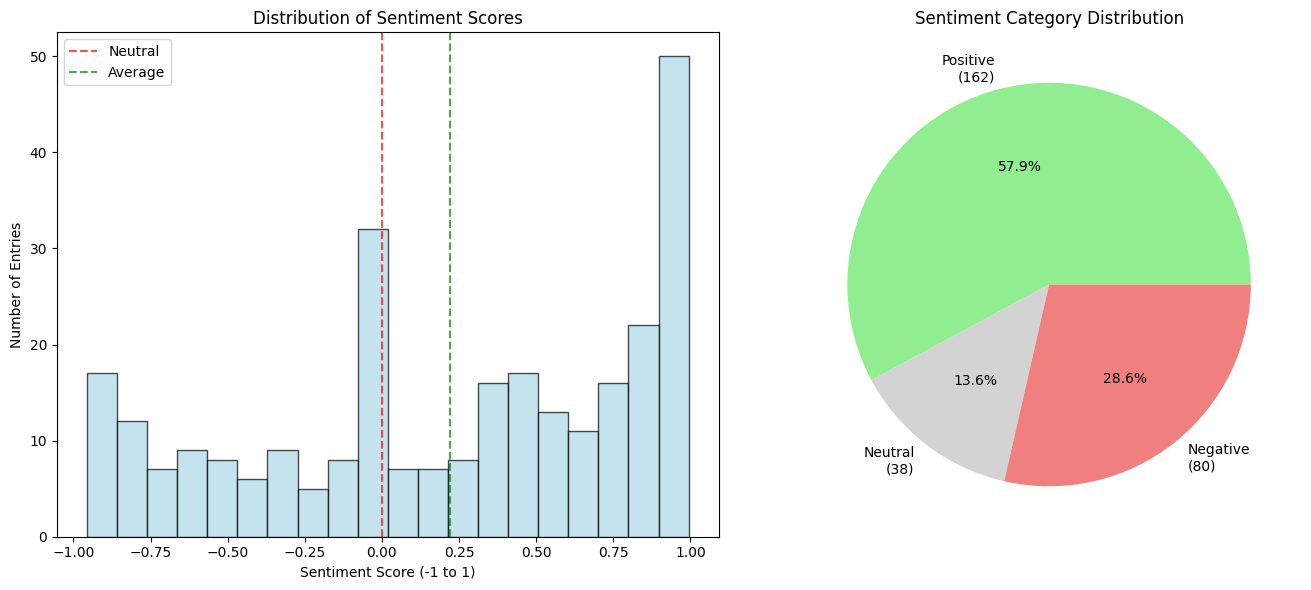

In [ ]:
 #Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution')

plt.tight_layout()
plt.show()


# Human vs. Automated Sentiment Check

In [ ]:
# Sample 5 entries for human vs. VADER comparison
sample_entries = df.sample(5)

print("🧠 HUMAN vs. VADER SENTIMENT COMPARISON")
print("=" * 45)
print("Read each text below and judge its sentiment, then compare to VADER's score:\n")

for i, (idx, row) in enumerate(sample_entries.iterrows(), 1):
    print(f"Text {i}:")
    print(f"'{row['audience-reviews__review'][:10000000]}...'")
    print(f"VADER Score: {row['sentiment_score']:.3f}")
    print(f"Your Human Judgment: _____ (Positive/Neutral/Negative)")
    print(f"Agreement? _____ (Yes/No - explain any differences)")
    print()

🧠 HUMAN vs. VADER SENTIMENT COMPARISON
Read each text below and judge its sentiment, then compare to VADER's score:

Text 1:
'An absolute MASTERPIECE. I had to create a rotten tomatoes account just to leave a review somewhere. The cinematography, the acting , the story line and suspense. The INTENSITY. They did an incredible job. It definitely gave me American Psycho vibes combined with the amazing cinematography of Gladiator. And I can't say the movie would have been the same with another actor as the lead. It was so impressive to see him play so many different versions of one character. I think reading how he improvised some scenes only further emphasizes how much he succeeded in this role. Major applause to the director not only for the creation of this masterpiece but embracing the direction the actor took it as well. 
And again … Cinematography 🏆 🏆 🏆...'
VADER Score: 0.949
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

T

# Final Insights for Rotten Tomatoes


**negative sentiment**


**positive sentiment**


**overall sentiment**


**broader impact**